In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import pinv
from scipy.linalg import sqrtm
from scipy.linalg import svd
from scipy.linalg import expm
from scipy.linalg import eig
from sklearn.linear_model import Ridge

betafix = np.random.rand(10)
class genedata:
    def __init__(self,n,p):
        Sigma = 0.5 * (np.ones((n,n)) + np.identity(n))
        W = np.random.normal(0,1,(n,p))
        self.X = np.real(sqrtm(Sigma)).dot(W)
        self.beta = betafix 
        y = self.X.dot(self.beta) + np.random.normal(0,1,n)
        self.y = np.reshape(y,(n,1))

In [ ]:
def GD(ep,T,X,y):
    betap = beta0
    results = []
    results.append(beta0)
    for ti in range(T):
        grad = X.T.dot(X.dot(betap)-y)/n
        beta = betap - ep * grad
        betap =beta
        results.append(beta)

    return np.array(results)

def SGD(ep,m,T,X,y):
    betap = beta0
    results = []
    results.append(beta0)
    for ti in range(T):
        # randomly choose Ik(minibatch) with repalcement
        Ik = np.random.choice(n,m)
        Xm = X[Ik]
        ym = y[Ik]
        grad = Xm.T.dot(Xm.dot(betap)-ym)/m
        beta = betap - ep * grad
        betap = beta
        results.append(beta)

    return np.array(results)

def GF(ep,T,X,y):
    results = []
    for ti in range(T):
        beta = pinv(X.T.dot(X)).dot(np.identity(p)-expm(-ti*ep*X.T.dot(X)/n)).dot(X.T).dot(y)
        results.append(beta)
    return np.array(results)

def SGF(ep,T,X,y):
    betap = beta0
    results = []
    results.append(beta0)
    ntry = 10
    for ti in range(T):
        grad = X.T.dot(X.dot(betap)-y)/n
        beta = betap - ep * grad
        # compute the variance of stochastic gradient
        sample = np.zeros((ntry,p))
        for i in range(ntry):
            Ik = np.random.choice(n,m)
            Xm = X[Ik]
            ym = y[Ik]
            grad = Xm.T.dot(Xm.dot(betap)-ym)/m
            sample[i] = grad[:,0]
        data = np.reshape(sample,(ntry,p))
        var = np.cov(data,rowvar=False)
        var = np.real(sqrtm(var))
        ans = np.dot(var,np.random.normal(0,1,len(beta)))
        ans = np.reshape(ans,(p,1))
        beta = beta - ep * ans
        betap = beta
        results.append(beta)
    return np.array(results)

def ridge(lam,X,y):
    results = []
    u, s, vt = svd(X)
    v = vt.T
    for a in lam:
        beta = 0
        for i in range(len(s)):
            beta +=  v[:,i]*s[i]/(s[i]**2+a*n) * (u[:,i].T.dot(y))
        results.append(beta)
    return np.array(results)


Text(0.5, 1.0, 'Stochastic Gradient Flow')

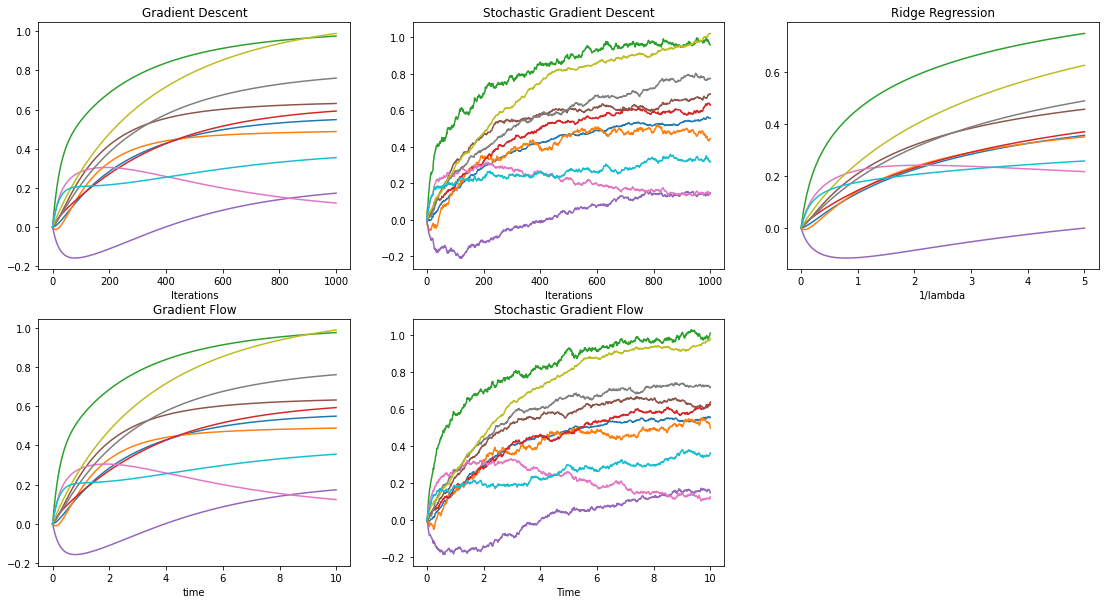

In [ ]:
# data size and generate data
n = 50
p = 10
data = genedata(n,p)
X = data.X
y = data.y

# initial weights for GD,SGD,GF,and SGF
beta0 = np.zeros((p,1))
# learning rate and batch size for sgd
ep = 0.01
m = 10
# number of steps
T = 1000

# ridge parameters in logscale range
lam_set = np.linspace(0.0001,5,100) 

w_GD = GD(ep,T)
w_GF = GF(ep,T)
w_SGD = SGD(ep,m,T)
w_SGF = SGF(ep,T)
w_ridge= ridge(1/lam_set)

# plot solution path
plt.figure(figsize=(19,10))

plt.subplot(2,3,1)
plt.plot(np.arange(len(w_GD)),w_GD[:,:,0])
plt.xlabel("Iterations")
plt.title("Gradient Descent")

plt.subplot(2,3,2)
plt.plot(np.arange(len(w_SGD)),w_SGD[:,:,0])
plt.xlabel("Iterations")
plt.title("Stochastic Gradient Descent")

plt.subplot(2,3,3)
plt.plot(lam_set,w_ridge)
plt.xlabel("1/lambda")
plt.title("Ridge Regression")

plt.subplot(2,3,4)
plt.plot(np.arange(len(w_GF))*ep,w_GF[:,:,0])
plt.xlabel("time")
plt.title("Gradient Flow")

plt.subplot(2,3,5)
plt.plot(np.arange(len(w_SGF))*ep,w_SGF[:,:,0])
plt.xlabel("Time")
plt.title("Stochastic Gradient Flow")